# Traffic Dataset

## 1. METR-LA Dataset

- Traffic forecasting dataset based on Los Angeles Metropolitan traffic 
- 207 loop detectors on highways
- March 2012 - June 2012

In [3]:
import torch
from torch_geometric_temporal.dataset import METRLADatasetLoader, PemsBayDatasetLoader
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from torch_geometric_temporal.signal import temporal_signal_split

In [4]:
loader = METRLADatasetLoader(raw_data_dir='./data/METR-LA')

In [5]:
dataset = loader.get_dataset(num_timesteps_in=12, num_timesteps_out=12)


print("Dataset type:  \n", dataset)
print("Number of samples / sequences: ",  len(set(dataset)))

Dataset type:  
Number of samples / sequences:  34249


In [6]:
data = next(iter(dataset))

In [7]:
data

Data(x=[207, 2, 12], edge_index=[2, 1722], edge_attr=[1722], y=[207, 12])

In [8]:
data.edge_index

tensor([[  0,   0,   0,  ..., 206, 206, 206],
        [  0,  13,  37,  ..., 187, 198, 206]])

<AxesSubplot:>

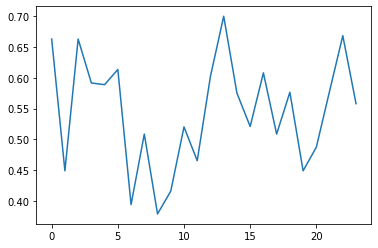

In [9]:
sensor_number = 1
hours = 24*1
sensor_labels = [bucket.y[sensor_number][0].item() for bucket in list(dataset)[:hours]]
sns.lineplot(data=sensor_labels)

In [10]:
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.8)

print("Number of train buckets: ", len(set(train_dataset)))
print("Number of test buckets: ", len(set(test_dataset)))

Number of train buckets:  27399
Number of test buckets:  6850


In [11]:
loader2 = PemsBayDatasetLoader(raw_data_dir='./data/PEMS-BAY')

In [12]:
dataset2 = loader2.get_dataset(num_timesteps_in=12, num_timesteps_out=12)


print("Dataset type:  \n", dataset2)
print("Number of samples / sequences: ",  len(set(dataset2)))

Dataset type:  
Number of samples / sequences:  52082


In [13]:
data = next(iter(dataset2))
data

Data(x=[325, 2, 12], edge_index=[2, 2694], edge_attr=[2694], y=[325, 2, 12])

<AxesSubplot:>

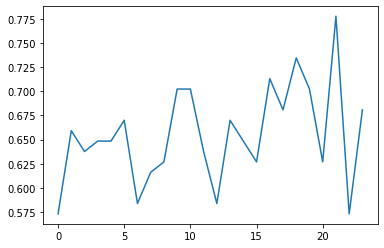

In [14]:
sensor_number = 1
hours = 24
sensor_labels = [bucket.y[sensor_number][0][0].item() for bucket in list(dataset2)[:hours]]
sns.lineplot(data=sensor_labels)

In [15]:
metr_la = np.load('./data/METR-LA/node_values.npy')

In [16]:
metr_la.shape

(34272, 207, 2)

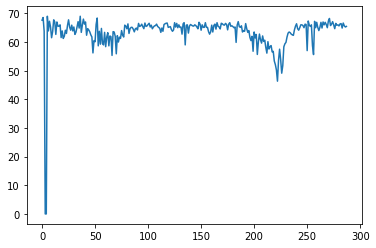

In [17]:
plt.plot(metr_la[:24*12,1,0])

In [18]:
metr_la = np.moveaxis(metr_la, 0, 1)

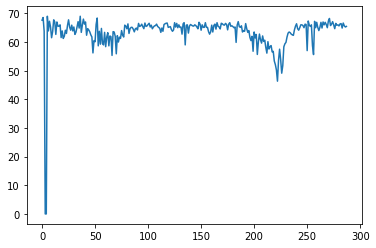

In [19]:
plt.plot(metr_la[1, :24*12, 0])

In [20]:
adj_matrix = np.load('./data/METR-LA/adj_mat.npy')

In [21]:
adj_matrix.shape

(207, 207)

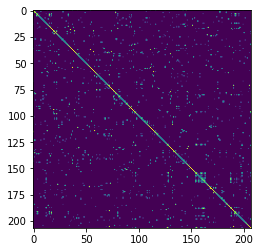

In [22]:
plt.imshow(adj_matrix)